In [1]:
from copy import deepcopy
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import myModule as myM
import seaborn as sns

# Daudi's model
## Expression in non immigration case

\begin{equation}
    \left\{\begin{array}{l}
        \frac{\mathrm{d}x}{\mathrm{d}t} =	- \alpha x y - \lambda x	\\
        \frac{\mathrm{d}y}{\mathrm{d}t} =	e_1\alpha x y + \gamma w -\delta y - \mu_y y	\\
        \frac{\mathrm{d}z}{\mathrm{d}t} =	\delta y - \mu_z z	\\
        \frac{\mathrm{d}w}{\mathrm{d}t} =	\rho z - \gamma w - \mu_w w	\\
    \end{array}\right.
    \label{eq1}
\end{equation}

## Simulation of Daudi's model using RK4
### initialisation

In [2]:
k = 500
y0 = 0
z0 = np.array([15, 30, 45, 60])
w0 = 0

r = 0.0417
d = 0.071
ga = 0.071
my = 0.0071
mz = 0.115
mw = 0.0417
l = 0.0015
e = 1.6
an = 0.000154

rate = np.array([an, l, ga, d, r, my, mz, mw, e])

t0 = 0
t1 = 63
T = 160

I1 = [t0,T]
leg = ['Maize', 'Caterpillar', 'Adult', 'Eggs']

### Simulation

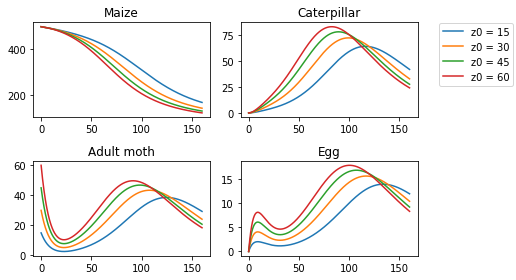

In [3]:
i = 0
s0 = np.array([k, y0, z0[i], w0])
solD = myM.solver(rate, s0, I1)
    
fig, axes = plt.subplots(2,2) # 2*2 array axes id
for i in range(z0.size):
    s0 = np.array([k, y0, z0[i], w0])
    solD.set_input(rate, s0, I1)
    solD.daudiModSol()
    solD.printSol(fig)

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, bbox_to_anchor=(1.2, 0.91), loc = 'upper right')

#plt.show()


# My model
## Expression in non immigration case

\begin{equation}
    \left\{\begin{array}{l}
        \frac{\mathrm{d}x}{\mathrm{d}t} =	\lambda x (1 - \frac{x}{k}) - \frac{\alpha}{at + 1} x y	\\
        \frac{\mathrm{d}y}{\mathrm{d}t} =	\gamma w - (e\alpha x + \delta) y - \mu_y y	\\
        \frac{\mathrm{d}z}{\mathrm{d}t} =	(e_1\alpha x + \delta) y - \mu_z z	\\
        \frac{\mathrm{d}w}{\mathrm{d}t} =	\rho z - \gamma w - \mu_w w	\\
    \end{array}\right.
    \label{eq1}
\end{equation}

## Simulation of my model using RK4
### initialisation

In [4]:
k = 300
y0 = 0
z0 = np.array([0, 30, 45, 60])
w0 = 0

r = 0.50#0.0417     # fertility rate
d = 0.071           # larvae -> adult
ga = 0.071          # egg -> larvae
my = 1/16#0.0071         # larvae mortality rate
mz = 1/17.5 # 0.115          # adult mortality rate
mw = 1/2.5 # 0.04           # egg mortality rate
l = 0.015 #0.015   # maize mortality rate due to climatic condition
e = 1.6             # larvae growth or survival rate per plant consumption
an = 0.000154       # destruction of plant per larvae over time
tau = 0.001          # resistance rate of the plant over time
sig = 0.01          # migration rate of adult
s = 3*k/3             # threshold

rate = np.array([an, l, ga, d, r, my, mz, mw, e, tau, sig, s])

# t0 = 0
# t1 = 63
# T = 160

# I1 = [t0,t1]

### Simulation

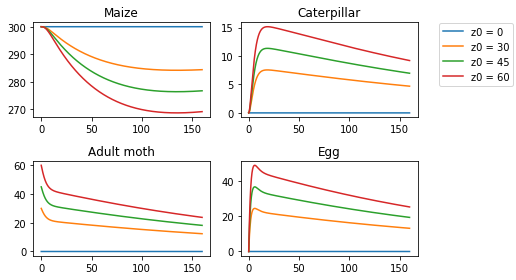

In [5]:
fig2, axes = plt.subplots(2,2) # 2*2 array axes id
for i in range(z0.size):
    s0 = np.array([k, y0, z0[i], w0])
    solD.set_input(rate, s0, I1)
    solD.myModSol()
    solD.printSol(fig2)

lines, labels = fig2.axes[-1].get_legend_handles_labels()
fig2.legend(lines, labels, bbox_to_anchor=(1.2, 0.91), loc = 'upper right')

#plt.show()